<a href="https://colab.research.google.com/github/andersonjhones/Classification/blob/main/Previsao_alunos5ano_ce_2019_Evasao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento e Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
dataset_path_2019 = 'classificacao'
alunos2019 = pd.read_csv(dataset_path_2019)

# for col in df.columns:
#   df = df[df[col] != '.']

# for col in df.columns:
#   df = df[df[col] != '*']

In [ ]:
df = alunos2019.drop(['area', 'rede', 'localizacao', 
                              'id_turma', 'turno', 'caderno', 'bloco_1', 
                              'bloco_2', 'estrato', 
                              'peso_aluno', 'id_municipio'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
for col in df.columns.tolist():
  df = df.drop(df[df[col]=='.'].index)

In [ ]:
df.head()

,id_escola,id_aluno,raca_cor,mora_mae,mora_pai,mora_irmaos,mora_avos,mora_outros_parentes,idioma_domicilio,possui_moradia_rua_urbanizada,...,leitura_livros_geral,leitura_historia_quadrinhos,"('proficiencia', 'LP')","('proficiencia', 'MT')","('erro_padrao', 'LP')","('erro_padrao', 'MT')","('proficiencia_saeb', 'LP')","('proficiencia_saeb', 'MT')","('erro_padrao_saeb', 'LP')","('erro_padrao_saeb', 'MT')"
4,23168862,37138837,C,B,B,B,A,A,A,B,...,C,B,0.000100,1.104685,0.353841,0.530368,249.990499,311.707797,19.494291,29.643502
6,23168862,37138839,C,B,B,B,A,A,A,A,...,B,B,1.272449,0.417562,0.615117,0.338354,320.088484,273.302893,33.888864,18.911393
8,23168862,37138856,C,B,B,B,A,A,A,B,...,B,B,-0.303859,0.625281,0.322585,0.353662,233.244376,284.912792,17.772292,19.766992
12,23168862,37138860,F,B,B,B,A,A,A,A,...,B,B,-0.771717,-1.015445,0.342242,0.326213,207.468505,193.208796,18.855263,18.232804
14,23168862,37138862,C,B,B,A,B,A,A,B,...,C,C,0.269155,0.569936,0.416949,0.378907,264.813644,281.819431,22.971123,21.177994


**Primeiros atributos utilizados**

In [ ]:
X = df[['raca_cor', 'mora_mae', 'mora_pai', 'mora_irmaos',
        'mora_avos', 'mora_outros_parentes', 'idioma_domicilio',
        'possui_moradia_rua_urbanizada', 'possui_agua_encanada',
        'possui_eletrecidade', 'possui_casa_dormitorio',
        'possui_casa_quarto_individual', 'possui_casa_banheiro',
        'possui_casa_garagem', 'possui_automovel', 'possui_geladeira',
        'possui_freezer', 'possui_microondas', 'possui_maquina_lavar_roupa',
        'possui_aspirador_po', 'possui_tv', 'possui_tv_assinatura',
        'possui_internet', 'possui_computador', 'possui_tablet',
        'possui_escrivaninha', 'possui_empregada_domestica', 'escolaridade_mae',
        'escolaridade_pai', 'responsaveis_conversam_escola',
        'responsaveis_incentivam_realizacao_licao_casa',
        'responsaveis_incentivam_estudos',
        'responsaveis_incentivam_comparecer_aulas',
        'responsaveis_comparecem_reuniao_pais', 'tempo_chegada_escola',
        'forma_chegada_escola', 'idade_entrada_escola', 'rede_ef', 'reprovacao',
        'tempo_lazer', 'tempo_cursos',
        'tempo_trabalho_domestico', 'tempo_estudos', 'leitura_noticias',
        'leitura_livros_geral', 'leitura_historia_quadrinhos']]

In [ ]:
X.shape

(55748, 46)

**Diminuição de atributos (Configuração que está sendo utilizada)**

In [ ]:
X = df[['possui_agua_encanada', 'reprovacao', 'idade_entrada_escola', 'leitura_noticias', 
        'leitura_historia_quadrinhos', 'possui_moradia_rua_urbanizada', 'tempo_estudos',
        'possui_escrivaninha', 'tempo_trabalho_domestico', 'mora_pai', 'possui_casa_quarto_individual',
        'forma_chegada_escola', 'tempo_chegada_escola', 'mora_avos', 'responsaveis_conversam_escola',
        'possui_tv', 'responsaveis_comparecem_reuniao_pais', 'possui_computador', 'raca_cor', 
        'responsaveis_incentivam_estudos', 'possui_casa_banheiro'
        ]]

In [ ]:
X.shape

(55748, 21)

**Segunda diminuição de atributos reduziu as métricas de avaliação como a acurácia em torno de 12 a 15, além de prejudicar métricas como recall e precision**

In [ ]:
X = df[['possui_agua_encanada', 'reprovacao', 'idade_entrada_escola', 'leitura_noticias', 
        'leitura_historia_quadrinhos', 'possui_moradia_rua_urbanizada', 'tempo_estudos',
        'possui_escrivaninha', 'tempo_trabalho_domestico'
        ]]

In [ ]:
X.head()

,possui_agua_encanada,reprovacao,idade_entrada_escola,leitura_noticias,leitura_historia_quadrinhos,possui_moradia_rua_urbanizada,tempo_estudos,possui_escrivaninha,tempo_trabalho_domestico,mora_pai,...,forma_chegada_escola,tempo_chegada_escola,mora_avos,responsaveis_conversam_escola,possui_tv,responsaveis_comparecem_reuniao_pais,possui_computador,raca_cor,responsaveis_incentivam_estudos,possui_casa_banheiro
0,.,A,A,B,C,.,C,.,C,B,...,.,.,.,B,.,C,.,B,C,.
1,B,C,A,B,C,A,.,.,B,B,...,F,A,A,C,A,A,B,B,B,D
2,B,A,A,A,A,A,D,B,B,A,...,E,B,A,B,B,A,A,F,B,B
3,B,A,A,B,B,B,B,A,C,.,...,G,A,.,.,B,.,B,.,.,B
4,A,A,B,B,B,B,D,B,A,B,...,F,A,A,B,C,C,D,C,C,C


In [ ]:
X.shape

(99185, 9)

In [ ]:
y = df['evasao_escolar_ate_final_ano']
y.unique()

array(['A', 'B', 'C', '*'], dtype=object)

In [ ]:
# escala de acordo com as respostas aos questionários
def my_encoder(v):
  if v == '*':
    return 1
  elif v == '.':
    return 1
  elif v == 'A':
    return 0
  elif v == 'B':
    return 1
  elif v == 'C':
    return 1

y = y.apply(my_encoder)

In [ ]:
y.head()

4     0
6     0
8     0
12    0
14    0
Name: evasao_escolar_ate_final_ano, dtype: int64

In [ ]:
y.value_counts()

0    52008
1     3740
Name: evasao_escolar_ate_final_ano, dtype: int64

In [ ]:
88666/10519

8.42912824412967

**X usando label enccoder teve valores bem inferiores das métricas comparado com o one hot encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(lambda col: le.fit_transform(col))

In [ ]:
X.head()

,possui_agua_encanada,reprovacao,idade_entrada_escola,leitura_noticias,leitura_historia_quadrinhos,possui_moradia_rua_urbanizada,tempo_estudos,possui_escrivaninha,tempo_trabalho_domestico,mora_pai,...,forma_chegada_escola,tempo_chegada_escola,mora_avos,responsaveis_conversam_escola,possui_tv,responsaveis_comparecem_reuniao_pais,possui_computador,raca_cor,responsaveis_incentivam_estudos,possui_casa_banheiro
0,1,2,2,3,4,1,4,1,4,3,...,1,1,1,3,1,4,1,3,4,1
1,3,4,2,3,4,2,1,1,3,3,...,7,2,2,4,2,2,3,3,3,5
2,3,2,2,2,2,2,5,3,3,2,...,6,3,2,3,3,2,2,7,3,3
3,3,2,2,3,3,3,3,2,4,1,...,8,2,1,1,3,1,3,1,1,3
4,2,2,3,3,3,3,5,3,2,3,...,7,2,2,3,4,4,5,4,4,4


In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dython.nominal import associations


In [ ]:
data = pd.concat([X, y], axis=1)

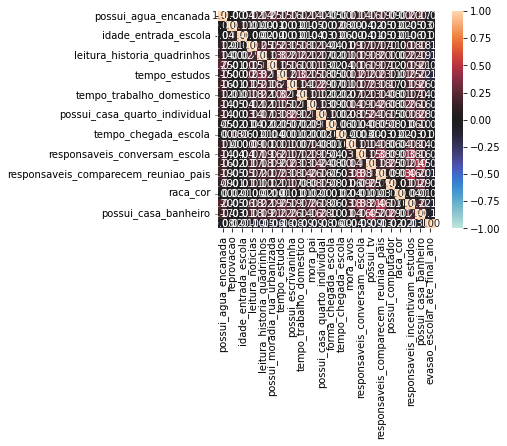

{'ax': <AxesSubplot:>,
 'corr':                                       possui_agua_encanada  reprovacao  \
 possui_agua_encanada                              1.000000   -0.004737   
 reprovacao                                       -0.004737    1.000000   
 idade_entrada_escola                             -0.035039    0.114731   
 leitura_noticias                                  0.115626    0.008620   
 leitura_historia_quadrinhos                       0.137021    0.004487   
 possui_moradia_rua_urbanizada                     0.248188   -0.011279   
 tempo_estudos                                     0.145746   -0.001535   
 possui_escrivaninha                               0.159496   -0.011118   
 tempo_trabalho_domestico                          0.115549    0.013944   
 mora_pai                                          0.135924   -0.045890   
 possui_casa_quarto_individual                     0.136939   -0.004840   
 forma_chegada_escola                              0.053636   -0.0196

In [ ]:
associations(data)

**X usando one hot encoder (Forma que está sendo utilizada)**

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,possui_agua_encanada_A,possui_agua_encanada_B,reprovacao_A,reprovacao_B,reprovacao_C,idade_entrada_escola_A,idade_entrada_escola_B,idade_entrada_escola_C,idade_entrada_escola_D,leitura_noticias_A,...,raca_cor_D,raca_cor_E,raca_cor_F,responsaveis_incentivam_estudos_A,responsaveis_incentivam_estudos_B,responsaveis_incentivam_estudos_C,possui_casa_banheiro_A,possui_casa_banheiro_B,possui_casa_banheiro_C,possui_casa_banheiro_D
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
8,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
14,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
#correlação com o target

df_corr = X.copy()
df_corr['evasao_escolar_ate_final_ano'] = y 
df_corr.corr()['evasao_escolar_ate_final_ano'].apply(abs).sort_values(ascending=False)[:20]

evasao_escolar_ate_final_ano            1.000000
tempo_estudos                           0.159876
leitura_historia_quadrinhos             0.148621
responsaveis_incentivam_estudos         0.131203
responsaveis_comparecem_reuniao_pais    0.129109
leitura_noticias                        0.100565
possui_casa_banheiro                    0.096976
mora_pai                                0.094029
possui_tv                               0.093447
tempo_trabalho_domestico                0.088396
responsaveis_conversam_escola           0.087223
possui_agua_encanada                    0.083591
possui_escrivaninha                     0.079522
possui_casa_quarto_individual           0.078280
possui_moradia_rua_urbanizada           0.064639
forma_chegada_escola                    0.056419
mora_avos                               0.037276
possui_computador                       0.024209
reprovacao                              0.020991
raca_cor                                0.016862
Name: evasao_escolar

**Aplicação de algoritmo antes de balanceamento das classes**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape

(44598, 70)

In [ ]:
dados = X_test.copy()

In [ ]:
dados['evasao_escolar_ate_final_ano'] = y_test

In [ ]:
y1 = dados[dados['evasao_escolar_ate_final_ano']==1]

In [ ]:
y2 = dados[dados['evasao_escolar_ate_final_ano']==0]

In [ ]:
y3 = y2.sample(frac = .118648846, random_state =0)

In [ ]:
y1.shape, y2.shape, y3.shape, y_test.shape

((748, 71), (10402, 71), (1234, 71), (11150,))

In [ ]:
y1.reset_index(drop=True, inplace=True)
y3.reset_index(drop=True, inplace=True)

In [ ]:
y1.head()

,possui_agua_encanada_A,possui_agua_encanada_B,reprovacao_A,reprovacao_B,reprovacao_C,idade_entrada_escola_A,idade_entrada_escola_B,idade_entrada_escola_C,idade_entrada_escola_D,leitura_noticias_A,...,raca_cor_E,raca_cor_F,responsaveis_incentivam_estudos_A,responsaveis_incentivam_estudos_B,responsaveis_incentivam_estudos_C,possui_casa_banheiro_A,possui_casa_banheiro_B,possui_casa_banheiro_C,possui_casa_banheiro_D,evasao_escolar_ate_final_ano
0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
y3.head()

,possui_agua_encanada_A,possui_agua_encanada_B,reprovacao_A,reprovacao_B,reprovacao_C,idade_entrada_escola_A,idade_entrada_escola_B,idade_entrada_escola_C,idade_entrada_escola_D,leitura_noticias_A,...,raca_cor_E,raca_cor_F,responsaveis_incentivam_estudos_A,responsaveis_incentivam_estudos_B,responsaveis_incentivam_estudos_C,possui_casa_banheiro_A,possui_casa_banheiro_B,possui_casa_banheiro_C,possui_casa_banheiro_D,evasao_escolar_ate_final_ano
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
y4 =y1.append(y3, ignore_index=True)

In [ ]:
y4.shape

(1982, 71)

In [ ]:
y4.isnull().sum().sum()

0

In [ ]:
y4.head()

,possui_agua_encanada_A,possui_agua_encanada_B,reprovacao_A,reprovacao_B,reprovacao_C,idade_entrada_escola_A,idade_entrada_escola_B,idade_entrada_escola_C,idade_entrada_escola_D,leitura_noticias_A,...,raca_cor_E,raca_cor_F,responsaveis_incentivam_estudos_A,responsaveis_incentivam_estudos_B,responsaveis_incentivam_estudos_C,possui_casa_banheiro_A,possui_casa_banheiro_B,possui_casa_banheiro_C,possui_casa_banheiro_D,evasao_escolar_ate_final_ano
0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
y4['evasao_escolar_ate_final_ano'].value_counts()

0    1234
1     748
Name: evasao_escolar_ate_final_ano, dtype: int64

In [ ]:
y4

,possui_agua_encanada_A,possui_agua_encanada_B,reprovacao_A,reprovacao_B,reprovacao_C,idade_entrada_escola_A,idade_entrada_escola_B,idade_entrada_escola_C,idade_entrada_escola_D,leitura_noticias_A,...,raca_cor_E,raca_cor_F,responsaveis_incentivam_estudos_A,responsaveis_incentivam_estudos_B,responsaveis_incentivam_estudos_C,possui_casa_banheiro_A,possui_casa_banheiro_B,possui_casa_banheiro_C,possui_casa_banheiro_D,evasao_escolar_ate_final_ano
0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1978,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1979,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1980,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
Xprever = y4.drop('evasao_escolar_ate_final_ano', axis=1)
yprever = y4['evasao_escolar_ate_final_ano']

In [ ]:
Xprever.head()

,possui_agua_encanada_A,possui_agua_encanada_B,reprovacao_A,reprovacao_B,reprovacao_C,idade_entrada_escola_A,idade_entrada_escola_B,idade_entrada_escola_C,idade_entrada_escola_D,leitura_noticias_A,...,raca_cor_D,raca_cor_E,raca_cor_F,responsaveis_incentivam_estudos_A,responsaveis_incentivam_estudos_B,responsaveis_incentivam_estudos_C,possui_casa_banheiro_A,possui_casa_banheiro_B,possui_casa_banheiro_C,possui_casa_banheiro_D
0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
yprever.head()

0    1
1    1
2    1
3    1
4    1
Name: evasao_escolar_ate_final_ano, dtype: int64

### Usando Regressão Logística Antes do Balanceamento dos Dados

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


-----Métricas-----
Acurácia: 0.59
Precisão: 0.97
Recall: 0.18
F-score: 0.30
------------------
Matriz de confusão:


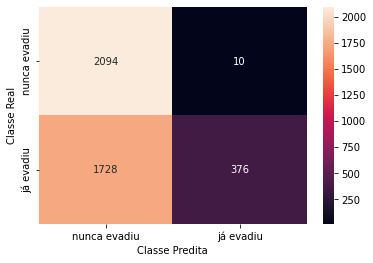

In [ ]:
def show_metrics(yts, y_pred):
  print('-----Métricas-----')
  print('Acurácia: %.2f' % accuracy_score(yts, y_pred))
  print('Precisão: %.2f' % precision_score(yts, y_pred))
  print('Recall: %.2f' % recall_score(yts, y_pred))
  print('F-score: %.2f' % f1_score(yts, y_pred))

  cmat = confusion_matrix(yts, y_pred)
  ax = sns.heatmap(cmat.astype(int), annot=True, fmt='g')
  _ = ax.set_xticklabels(['nunca evadiu', 'já evadiu'])
  _ = ax.set_yticklabels(['nunca evadiu', 'já evadiu'], rotation=90)

  ax.set_ylabel('Classe Real')
  ax.set_xlabel('Classe Predita')

  print('------------------')
  print('Matriz de confusão:')




from sklearn.linear_model import LogisticRegression

# Modelo de Classificação

# criando o modelo
model = LogisticRegression()

# treinando o modelo com o conjunto de treino
model.fit(X_train, y_train)

# fazendo as predições no conjunto de teste
y_pred = model.predict(Xprever)

# métricas de avaliação das predições
show_metrics(yprever, y_pred)

In [ ]:
print(classification_report(yprever, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2104
           1       0.97      0.18      0.30      2104

    accuracy                           0.59      4208
   macro avg       0.76      0.59      0.50      4208
weighted avg       0.76      0.59      0.50      4208



### Usando XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=300, eta= 0.2, max_depth=100)
model.fit(X_train, y_train)

print(model)                      

XGBClassifier(eta=0.2, max_depth=100, scale_pos_weight=300)


-----Métricas-----
Acurácia: 0.86
Precisão: 0.33
Recall: 0.33
F-score: 0.33
------------------
Matriz de confusão:


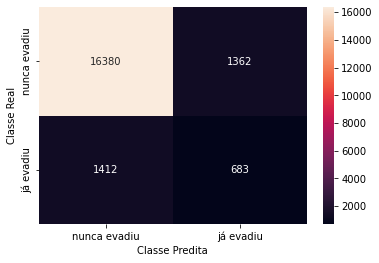

In [ ]:
# fazendo as predições no conjunto de teste
y_pred = model.predict(X_test)

# métricas de avaliação das predições
show_metrics(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     17742
           1       0.33      0.33      0.33      2095

    accuracy                           0.86     19837
   macro avg       0.63      0.62      0.63     19837
weighted avg       0.86      0.86      0.86     19837



Melhorou somente 2% de f1-core macro avg

## Balanceamento dos dados

In [ ]:
from imblearn  import under_sampling

In [ ]:
from imblearn.under_sampling  import RandomUnderSampler

In [ ]:
from imblearn.over_sampling import ADASYN

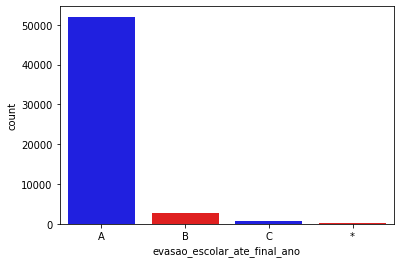

In [ ]:
import seaborn as sns

sns.countplot(x ='evasao_escolar_ate_final_ano', data = df, palette= ['b','r']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


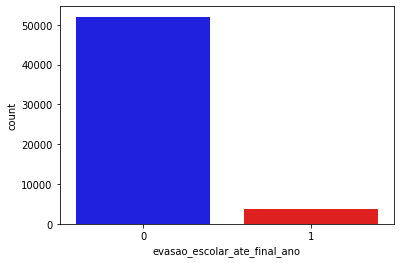

In [ ]:
sns.countplot(y, palette= ['b', 'r']);

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)

In [ ]:
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [ ]:
X_res, y_res = X_resampled, y_resampled

In [ ]:
from collections import Counter
rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X_train, y_train)
print(sorted(Counter(X_res).items()), y_res.shape)

[('forma_chegada_escola_A', 1), ('forma_chegada_escola_B', 1), ('forma_chegada_escola_C', 1), ('forma_chegada_escola_D', 1), ('forma_chegada_escola_E', 1), ('forma_chegada_escola_F', 1), ('forma_chegada_escola_G', 1), ('idade_entrada_escola_A', 1), ('idade_entrada_escola_B', 1), ('idade_entrada_escola_C', 1), ('idade_entrada_escola_D', 1), ('leitura_historia_quadrinhos_A', 1), ('leitura_historia_quadrinhos_B', 1), ('leitura_historia_quadrinhos_C', 1), ('leitura_noticias_A', 1), ('leitura_noticias_B', 1), ('leitura_noticias_C', 1), ('mora_avos_A', 1), ('mora_avos_B', 1), ('mora_pai_A', 1), ('mora_pai_B', 1), ('possui_agua_encanada_A', 1), ('possui_agua_encanada_B', 1), ('possui_casa_banheiro_A', 1), ('possui_casa_banheiro_B', 1), ('possui_casa_banheiro_C', 1), ('possui_casa_banheiro_D', 1), ('possui_casa_quarto_individual_A', 1), ('possui_casa_quarto_individual_B', 1), ('possui_computador_A', 1), ('possui_computador_B', 1), ('possui_computador_C', 1), ('possui_computador_D', 1), ('possu

In [ ]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
X_res.shape, y_res.shape

((83382, 70), (83382,))

In [ ]:
sns.countplot(y_res, palette= ['b', 'r']);

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dython.nominal import associations


In [ ]:
dfbl = pd.concat([X_res, y_res], axis=1)

In [ ]:
dfbl.head()

,possui_agua_encanada,reprovacao,idade_entrada_escola,leitura_noticias,leitura_historia_quadrinhos,possui_moradia_rua_urbanizada,tempo_estudos,possui_escrivaninha,tempo_trabalho_domestico,mora_pai,...,tempo_chegada_escola,mora_avos,responsaveis_conversam_escola,possui_tv,responsaveis_comparecem_reuniao_pais,possui_computador,raca_cor,responsaveis_incentivam_estudos,possui_casa_banheiro,evasao_escolar_ate_final_ano
0,1,2,2,3,4,1,4,1,4,3,...,1,1,3,1,4,1,3,4,1,0
1,3,4,2,3,4,2,1,1,3,3,...,2,2,4,2,2,3,3,3,5,1
2,3,2,2,2,2,2,5,3,3,2,...,3,2,3,3,2,2,7,3,3,0
3,3,2,2,3,3,3,3,2,4,1,...,2,1,1,3,1,3,1,1,3,0
4,2,2,3,3,3,3,5,3,2,3,...,2,2,3,4,4,5,4,4,4,0


**Associação entre as variáveis**

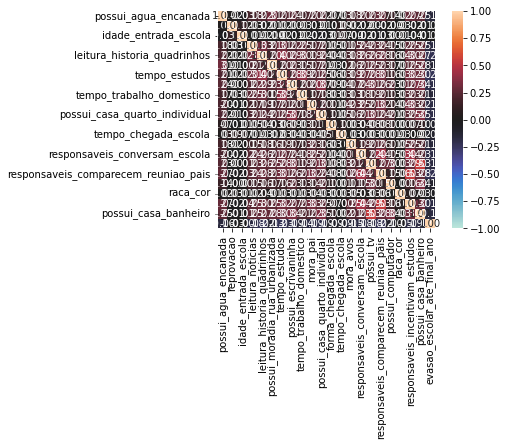

{'ax': <AxesSubplot:>,
 'corr':                                       possui_agua_encanada  reprovacao  \
 possui_agua_encanada                              1.000000    0.022044   
 reprovacao                                        0.022044    1.000000   
 idade_entrada_escola                             -0.029304    0.119697   
 leitura_noticias                                  0.183243    0.032728   
 leitura_historia_quadrinhos                       0.215985    0.024154   
 possui_moradia_rua_urbanizada                     0.308113    0.009090   
 tempo_estudos                                     0.212168    0.021751   
 possui_escrivaninha                               0.241076    0.002525   
 tempo_trabalho_domestico                          0.170376    0.028816   
 mora_pai                                          0.199852   -0.013126   
 possui_casa_quarto_individual                     0.215278    0.012132   
 forma_chegada_escola                              0.072219   -0.0145

In [ ]:
(associations(dfbl))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
X_train.shape

(83440, 70)

###Aplicação de Algoritmos com as Classes Balanceadas

### Regressão Logística novamente

-----Métricas-----
Acurácia: 0.93
Precisão: 0.00
Recall: 0.00
F-score: 0.00
------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Matriz de confusão:


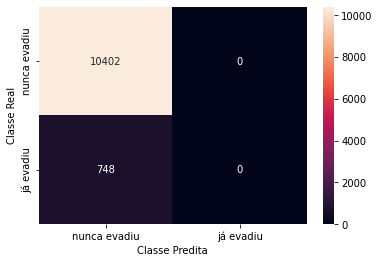

In [ ]:
def show_metrics(yts, y_pred):
  print('-----Métricas-----')
  print('Acurácia: %.2f' % accuracy_score(yts, y_pred))
  print('Precisão: %.2f' % precision_score(yts, y_pred))
  print('Recall: %.2f' % recall_score(yts, y_pred))
  print('F-score: %.2f' % f1_score(yts, y_pred))

  cmat = confusion_matrix(yts, y_pred)
  ax = sns.heatmap(cmat.astype(int), annot=True, fmt='g')
  _ = ax.set_xticklabels(['nunca evadiu', 'já evadiu'])
  _ = ax.set_yticklabels(['nunca evadiu', 'já evadiu'], rotation=90)

  ax.set_ylabel('Classe Real')
  ax.set_xlabel('Classe Predita')

  print('------------------')
  print('Matriz de confusão:')




from sklearn.linear_model import LogisticRegression

# Modelo de Classificação

# criando o modelo
model = LogisticRegression()

# treinando o modelo com o conjunto de treino
model.fit(X_res, y_res)

# fazendo as predições no conjunto de teste
#y_pred = model.predict(Xprever)
y_pred = model.predict(X_test)

# métricas de avaliação das predições
#show_metrics(yprever, y_pred)
show_metrics(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     10402
           1       0.00      0.00      0.00       748

    accuracy                           0.93     11150
   macro avg       0.47      0.50      0.48     11150
weighted avg       0.87      0.93      0.90     11150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test.value_counts()

0    10386
1      764
Name: evasao_escolar_ate_final_ano, dtype: int64

In [ ]:
3740/(3740+52008)

0.06708760852407261

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=42).fit(X_res)
clf.predict(X_test)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
import numpy as np
np.where(clf.predict(X_test)==1)

(array([    0,     1,     2, ..., 11147, 11148, 11149]),)

In [ ]:
X_res.shape, X_test.shape

((143994, 91), (19837, 91))

In [ ]:
 ypret=model.predict(X_train)

In [ ]:
show_metrics(clf.predict(X_test), y_test)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
print(classification_report(yprever, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      2104
           1       0.73      0.62      0.67      2104

    accuracy                           0.69      4208
   macro avg       0.70      0.69      0.69      4208
weighted avg       0.70      0.69      0.69      4208



**Intercept**

In [ ]:
model.intercept_

array([5.7407507])

**Coeficientes**

In [ ]:
model.coef_

array([[-0.1272479 , -0.1009867 ,  0.0047272 , -0.11829955, -0.20486643,
        -0.06367751, -0.16584615, -0.16576637, -0.02117868, -0.20712453,
        -0.22887577, -0.04679448, -0.27886668, -0.18151136, -0.07719663,
        -0.07906241, -0.16416101, -0.00279025, -0.04091106,  0.0222272 ,
        -0.01752206]])

**Naive Bayes Gaussiano**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_prednaive = naive.predict(X_test)

# métricas de avaliação das predições
show_metrics(y_test, y_prednaive)

NameError: ignored

In [ ]:
print(classification_report(y_test, y_prednaive))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68     17771
           1       0.69      0.48      0.57     17550

    accuracy                           0.63     35321
   macro avg       0.65      0.63      0.62     35321
weighted avg       0.65      0.63      0.62     35321



**Arvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

-----Métricas-----
Acurácia: 0.87
Precisão: 0.11
Recall: 0.14
F-score: 0.12
------------------
Matriz de confusão:


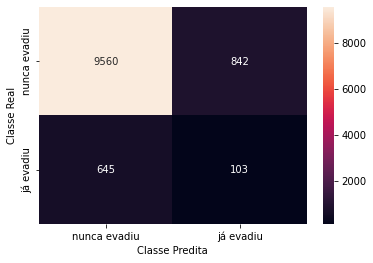

In [ ]:
y_arvore = arvore.predict(X_test)

# métricas de avaliação das predições
show_metrics(y_test, y_arvore)

In [ ]:
print(classification_report(y_test, y_arvore))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10402
           1       0.11      0.14      0.12       748

    accuracy                           0.87     11150
   macro avg       0.52      0.53      0.52     11150
weighted avg       0.88      0.87      0.87     11150



**Floresta aleatória**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest.fit(X_res, y_res)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_foresttrain = random_forest.predict(X_res)

In [ ]:
print(classification_report(y_res, y_foresttrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41606
           1       1.00      1.00      1.00     41776

    accuracy                           1.00     83382
   macro avg       1.00      1.00      1.00     83382
weighted avg       1.00      1.00      1.00     83382



-----Métricas-----
Acurácia: 0.62
Precisão: 0.00
Recall: 0.00
F-score: 0.00
------------------
Matriz de confusão:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


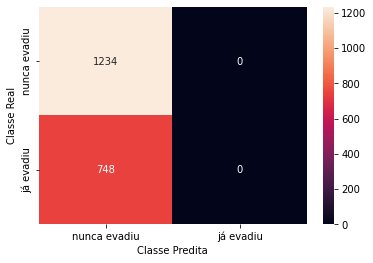

In [ ]:
y_forest = random_forest.predict(Xprever)
#y_forest = random_forest.predict(X_test)

# métricas de avaliação das predições
show_metrics(yprever, y_forest)
#show_metrics(y_test, y_forest)

In [ ]:
print(classification_report(yprever, y_forest))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1234
           1       0.00      0.00      0.00       748

    accuracy                           0.62      1982
   macro avg       0.31      0.50      0.38      1982
weighted avg       0.39      0.62      0.48      1982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Feaures mais importantes e seu peso para o modelo segundo  a biblioteca eli5 (O modelo utilizado foi o random forest)** 

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 50.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=204771e81ca5b171b9a3c62d458e8e488fceca92a6f173cc2841b85f1f6a8c27
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
PermutationImportancecl = PermutationImportance(random_forest, random_state=0).fit(X_train, y_train)
eli5.show_weights(PermutationImportancecl, feature_names = X_train.columns.tolist())

Weight,Feature
0.1350 ± 0.0014,responsaveis_comparecem_reuniao_pais
0.1293 ± 0.0011,mora_pai
0.0873 ± 0.0008,tempo_estudos
0.0856 ± 0.0018,possui_casa_quarto_individual
0.0855 ± 0.0006,responsaveis_conversam_escola
0.0830 ± 0.0010,leitura_historia_quadrinhos
0.0808 ± 0.0013,reprovacao
0.0799 ± 0.0018,possui_escrivaninha
0.0729 ± 0.0007,possui_agua_encanada
0.0689 ± 0.0014,responsaveis_incentivam_estudos


**K visinhos mais próximos**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

-----Métricas-----
Acurácia: 0.88
Precisão: 0.82
Recall: 0.97
F-score: 0.89
------------------
Matriz de confusão:


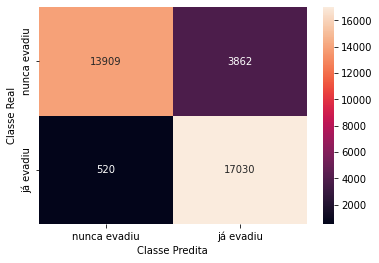

In [ ]:
y_knn = knn.predict(X_test)

# métricas de avaliação das predições
show_metrics(y_test, y_knn)

In [ ]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     17771
           1       0.82      0.97      0.89     17550

    accuracy                           0.88     35321
   macro avg       0.89      0.88      0.87     35321
weighted avg       0.89      0.88      0.87     35321



**Multlayer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural = MLPClassifier(max_iter=100, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (30,30))
rede_neural.fit(X_res, y_res)

Iteration 1, loss = 0.62486600
Iteration 2, loss = 0.58232858
Iteration 3, loss = 0.57417561
Iteration 4, loss = 0.56984505
Iteration 5, loss = 0.56786209
Iteration 6, loss = 0.56612630
Iteration 7, loss = 0.56382872
Iteration 8, loss = 0.56207211
Iteration 9, loss = 0.56017404
Iteration 10, loss = 0.55792836
Iteration 11, loss = 0.55588502
Iteration 12, loss = 0.55538768
Iteration 13, loss = 0.55165674
Iteration 14, loss = 0.55010164
Iteration 15, loss = 0.54936557
Iteration 16, loss = 0.54629005
Iteration 17, loss = 0.54531229
Iteration 18, loss = 0.54306732
Iteration 19, loss = 0.54075009
Iteration 20, loss = 0.53933815
Iteration 21, loss = 0.53783046
Iteration 22, loss = 0.53625403
Iteration 23, loss = 0.53393525
Iteration 24, loss = 0.53209537
Iteration 25, loss = 0.53158925
Iteration 26, loss = 0.52922504
Iteration 27, loss = 0.52931354
Iteration 28, loss = 0.52588836
Iteration 29, loss = 0.52419155
Iteration 30, loss = 0.52308420
Iteration 31, loss = 0.52171776
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=100, tol=1e-05,
              verbose=True)

-----Métricas-----
Acurácia: 0.72
Precisão: 0.20
Recall: 0.56
F-score: 0.29
------------------
Matriz de confusão:


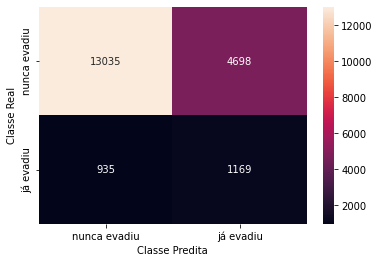

In [ ]:
y_rn = rede_neural.predict(X_test)

# métricas de avaliação das predições
show_metrics(y_test, y_rn)

In [ ]:
print(classification_report(y_test, y_rn))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     17771
           1       0.72      0.73      0.73     17550

    accuracy                           0.73     35321
   macro avg       0.73      0.73      0.73     35321
weighted avg       0.73      0.73      0.73     35321



In [ ]:
print(classification_report(y_test, y_rn))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     17771
           1       0.72      0.73      0.73     17550

    accuracy                           0.73     35321
   macro avg       0.73      0.73      0.73     35321
weighted avg       0.73      0.73      0.73     35321



**Testando a importância dos atributos com  RandomForestClassifier e a biblioteca shap**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
import numpy as np


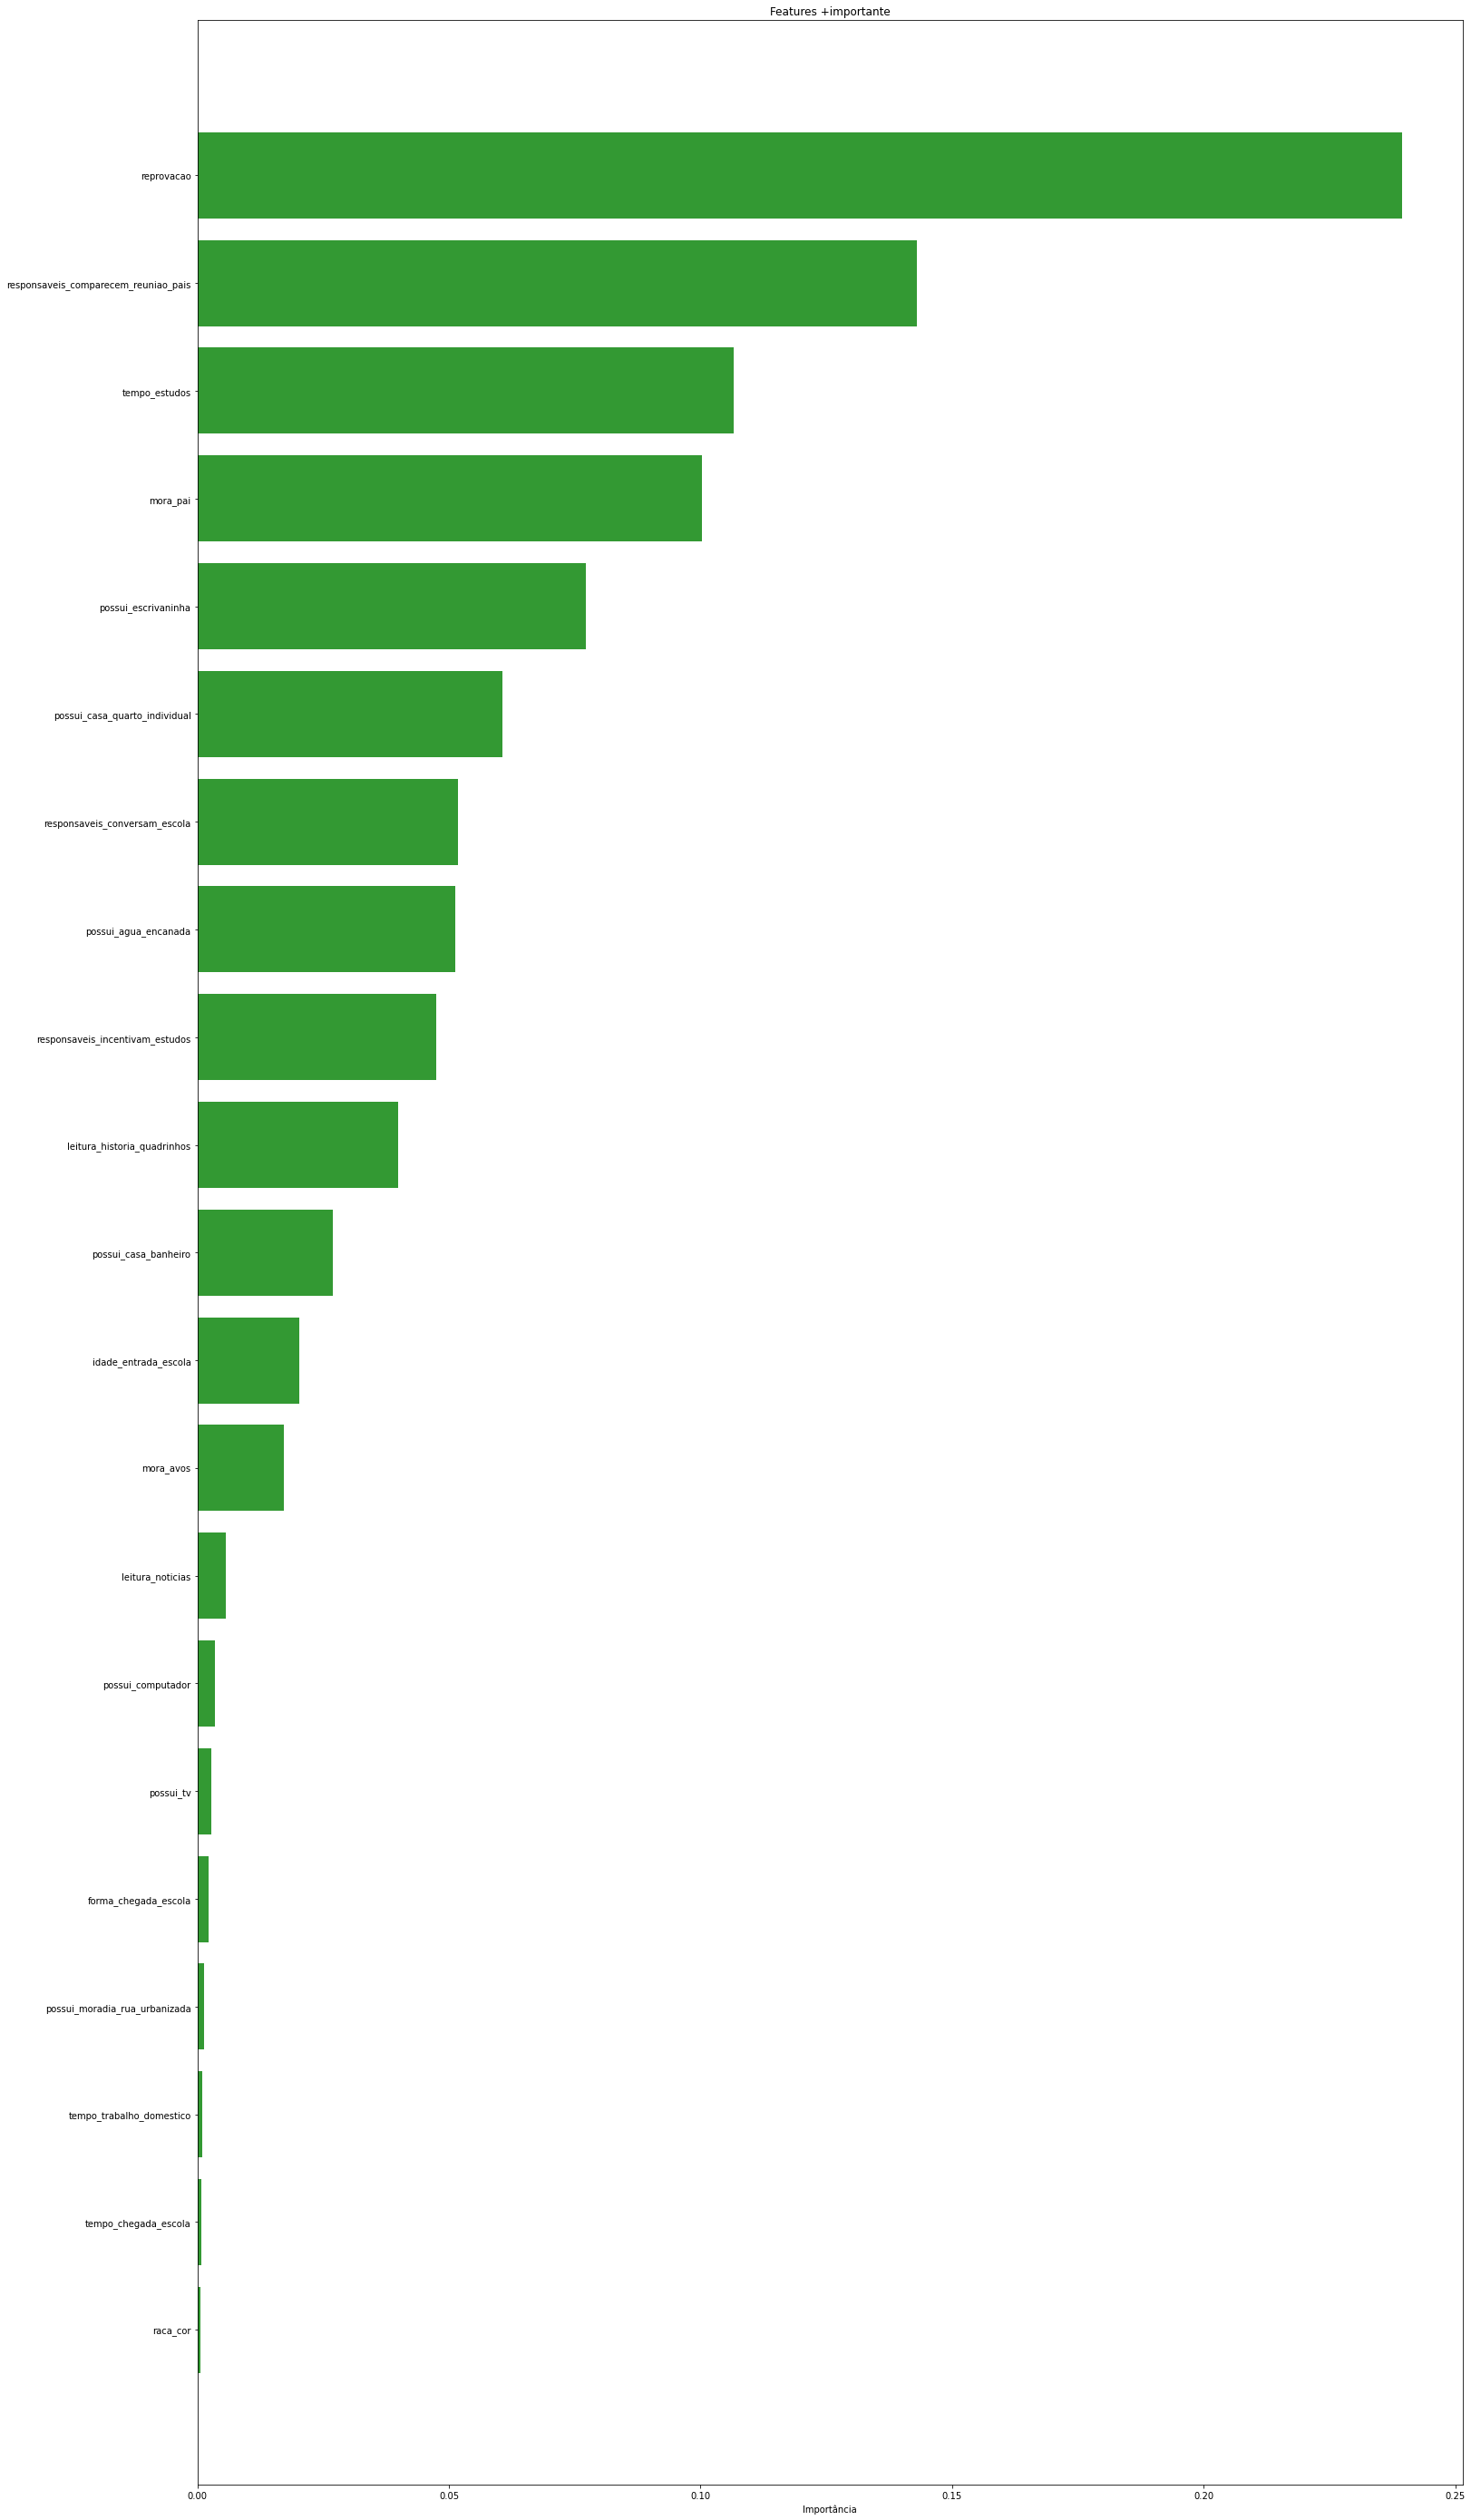

In [ ]:
random_state = 3
max_depth = 5
n_estimators = 8 
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(figsize=(25,50))
plt.title('Features +importante')
plt.barh(range(len(indices)), importances[indices], color='g', align='center',linestyle="solid",alpha=0.8)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância')
plt.savefig('Feature_importance.pdf')
plt.show()

**SHAP Values : Explicando os impactos das variáveis**

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

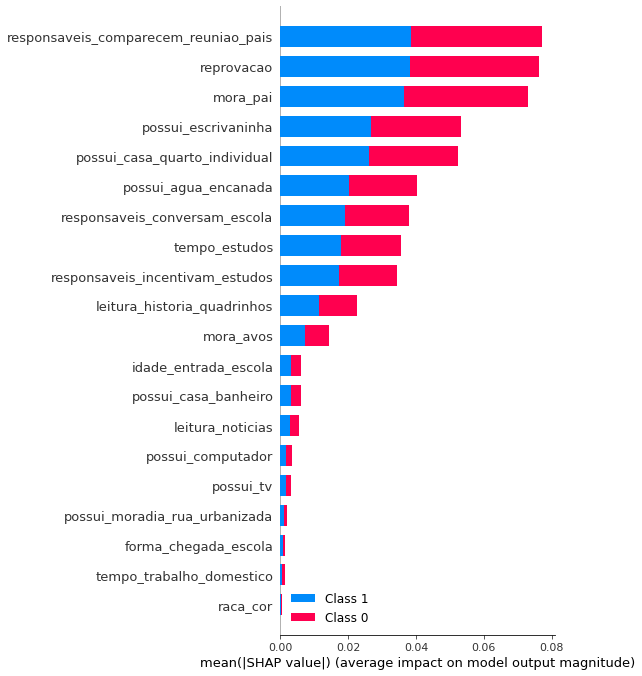

In [ ]:
explainer = shap.KernelExplainer(rfc.predict_proba,X_train[:100]);
shap_values = explainer.shap_values(X_train[:100]);
shap.summary_plot(shap_values, X_train[:100]);

**TreeExplainer do shap**

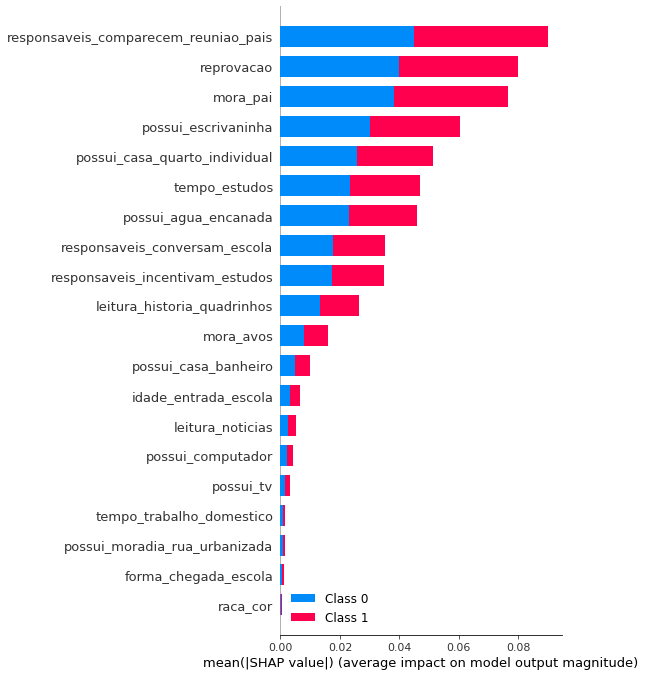

In [ ]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

**SHAP Values : Explicando os impactos das variáveis**

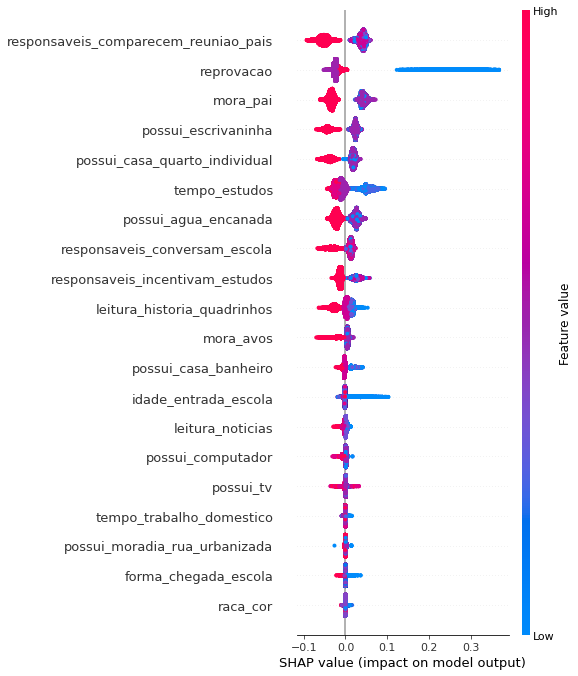

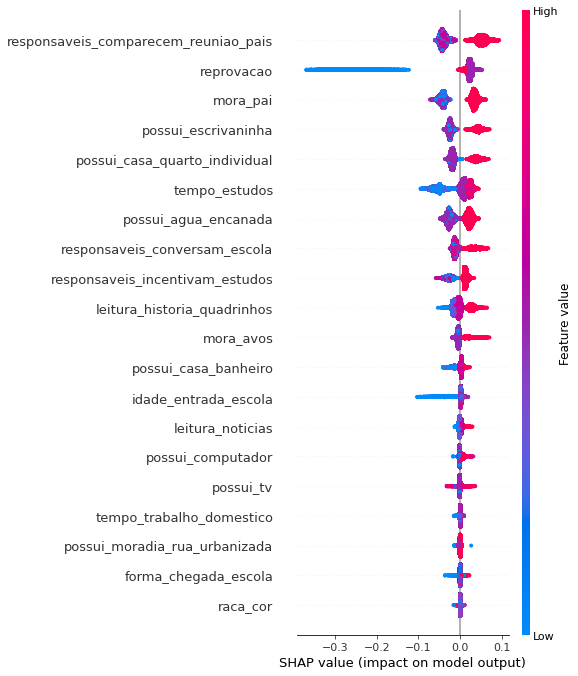

In [ ]:
shap.summary_plot(shap_values[1], X_train)
shap.summary_plot(shap_values[0], X_train)

**Ensemble de modelos (Votação de modelos)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
dt = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_features=1, max_depth=350, min_samples_split=3)
#svm_clf = SVC(kernel='rbf', C = 1)
voting_clf = VotingClassifier(
estimators=[ ('GNB', GNB), ('rf', rnd_clf), ('dt', dt)],
voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('GNB', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=350,
                                                     max_features=1,
                                                     min_samples_split=3,
                                                     n_estimators=250)),
                             ('dt', DecisionTreeClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (GNB, rnd_clf, dt, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('A acurácia em percentual é: ', clf.__class__.__name__, round(accuracy_score(y_test, y_pred)*100,2), '%')

A acurácia em percentual é:  GaussianNB 63.38 %
A acurácia em percentual é:  RandomForestClassifier 91.31 %
A acurácia em percentual é:  DecisionTreeClassifier 83.1 %
A acurácia em percentual é:  VotingClassifier 88.94 %


In [ ]:
from sklearn import metrics

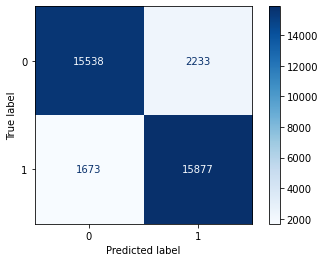

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues');
plt.grid(False)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89     17771
           1       0.88      0.90      0.89     17550

    accuracy                           0.89     35321
   macro avg       0.89      0.89      0.89     35321
weighted avg       0.89      0.89      0.89     35321



**Rede neural mlp com validação cruzada**

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Função para criar o modelo
def create_model():
  # cria o modelo
  model = Sequential()
  model.add(Dense(12, input_dim=91, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='tanh'))
  # Compila o modelo
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
seed = 0
np.random.seed(seed)

# criando o modelo 
model = KerasClassifier(build_fn=create_model, epochs=2, batch_size=10, verbose=1)
# Usando 10-fold para a validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# Visualização das acurácias dos 10 grupos e da acurácia média no treino
results = cross_val_score(model, X_test, y_test, cv=kfold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


Epoch 1/2
1786/1786 [==============================] - 7s 3ms/step - loss: 0.4798 - accuracy: 0.9005
Epoch 2/2
199/199 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.9022
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8962
Epoch 2/2
199/199 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.9108
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 0.7744 - accuracy: 0.8769
Epoch 2/2
199/199 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.9088
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 0.6436 - accuracy: 0.8921
Epoch 2/2
199/199 [==============================] - 0s 1ms/step - loss: 0.3041 - accuracy: 0.9057
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 1.3433 - accuracy: 0.8969
Epoch 2/2
199/199 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.8589


In [ ]:
print(results)
acuracias=results.mean()

[0.90221775 0.91078627 0.90877014 0.90574598 0.85887098 0.90120965
 0.89465725 0.90418559 0.90821987 0.90317702]


**Acurácia média de treino**

In [ ]:
print(acuracias.mean())

0.8997840523719788


**Predição dos dados de trino**

In [ ]:
y_predTreino = cross_val_predict(model, X_train, y_train, cv=kfold)
conf_matTreino = confusion_matrix(y_train, y_predTreino)

**Matriz de confusão dos dados de treino**

In [ ]:
show_metrics(y_train, y_predTreino)

**Métricas de classificação para os dados de treino**

In [ ]:
print(classification_report(y_train, y_predTreino))

**Predição de dados de teste**

In [ ]:
y_prednr = cross_val_predict(model, X_test, y_test, cv=kfold)
conf_mat = confusion_matrix(y_test, y_prednr)

Epoch 1/2
1786/1786 [==============================] - 7s 3ms/step - loss: 0.3995 - accuracy: 0.9023
Epoch 2/2
1786/1786 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.9070
Epoch 1/2
1786/1786 [==============================] - 7s 3ms/step - loss: 0.4141 - accuracy: 0.8899
Epoch 2/2
1786/1786 [==============================] - 5s 3ms/step - loss: 0.2963 - accuracy: 0.9054
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 0.5466 - accuracy: 0.8960
Epoch 2/2
1786/1786 [==============================] - 3s 2ms/step - loss: 0.2986 - accuracy: 0.9062
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 0.7741 - accuracy: 0.8894
Epoch 2/2
1786/1786 [==============================] - 3s 2ms/step - loss: 0.3595 - accuracy: 0.9037
Epoch 1/2
1786/1786 [==============================] - 4s 2ms/step - loss: 0.6039 - accuracy: 0.8944
Epoch 2/2
1786/1786 [==============================] - 3s 2ms/step - loss: 0.2946 - accurac

**Matriz de confusão dos dados de teste**

In [ ]:
print(conf_mat)

[[17641    92]
 [ 1769   335]]


-----Métricas-----
Acurácia: 0.91
Precisão: 0.78
Recall: 0.16
F-score: 0.26
------------------
Matriz de confusão:


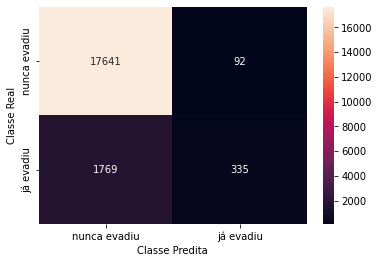

In [ ]:
show_metrics(y_test, y_prednr)

**Métricas de classificação para os dados de teste**

In [ ]:
print(classification_report(y_test, y_prednr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17733
           1       0.78      0.16      0.26      2104

    accuracy                           0.91     19837
   macro avg       0.85      0.58      0.61     19837
weighted avg       0.90      0.91      0.88     19837



**Notoriamente o modelo melhorou bastante com F1-score macro avg de 0.64 da Regressão Logística e 0.66 do Xgboost para 0.A Regressão Logística, com o Balanceamento dos dados, alcançou 95 % de acurácia totalizando em 30% de melhoria em relação ao modelo atuando sem balanceamento dosdados. O Random Forest e A votação de classificadores também alcançaram 95 % de acurácia. Para o classificador de votação o recall foi 1 e a precision 0,91 para a classe 0 e recall de 0,9 e precision de 1 para a classe 1. Para o classificador Random Forest o recall foi 1 e a precision 0,91 para a classe 0 e recall de 0,91 e precision de 1 para a classe 1**